In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
X,y=make_classification(n_samples=10000,n_classes=2,random_state=1)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
# Basic Logestic Model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Predicting based on proablity
model_prob=model.predict_proba(X_test)

In [10]:
#Focus on the postive outcome
model_prob = model_prob[:,1]

In [11]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9442296808295412


In [17]:
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds = roc_curve(y_test,model_prob)

In [18]:
thresholds

array([           inf, 9.99985059e-01, 9.99817598e-01, 9.99813358e-01,
       9.90436731e-01, 9.90338751e-01, 9.82043516e-01, 9.81909673e-01,
       9.71207971e-01, 9.71092640e-01, 9.63816442e-01, 9.63784420e-01,
       9.58903060e-01, 9.58894362e-01, 9.54711471e-01, 9.53990555e-01,
       9.53293219e-01, 9.53044768e-01, 9.51262844e-01, 9.50854642e-01,
       9.50259170e-01, 9.49508437e-01, 9.36959061e-01, 9.36857505e-01,
       9.13610699e-01, 9.10820302e-01, 9.09126302e-01, 9.08971104e-01,
       9.07944067e-01, 9.07425057e-01, 9.00678940e-01, 9.00205743e-01,
       8.85565545e-01, 8.82348515e-01, 8.66605718e-01, 8.66336894e-01,
       8.65647476e-01, 8.65010399e-01, 8.63844910e-01, 8.63698068e-01,
       8.61894533e-01, 8.61716645e-01, 8.50767800e-01, 8.49189477e-01,
       8.43323375e-01, 8.42656601e-01, 8.37966291e-01, 8.36755216e-01,
       8.33786464e-01, 8.33778921e-01, 8.24114417e-01, 8.20997377e-01,
       8.08747999e-01, 8.08416920e-01, 8.07464000e-01, 8.06581878e-01,
      

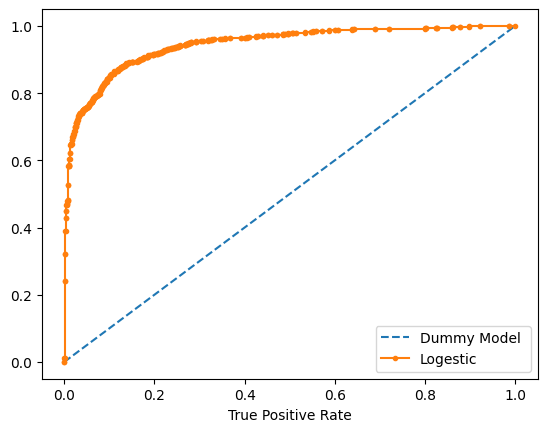

In [16]:
plt.plot(dummy_fpr,dummy_tpr,linestyle = '--', label = 'Dummy Model ')
plt.plot(model_fpr,model_tpr,marker = '.', label = 'Logestic')

plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.legend()

plt.show()

C:\Users\IsmartSiva\AppData\Local\Temp\ipykernel_12180\4062949553.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


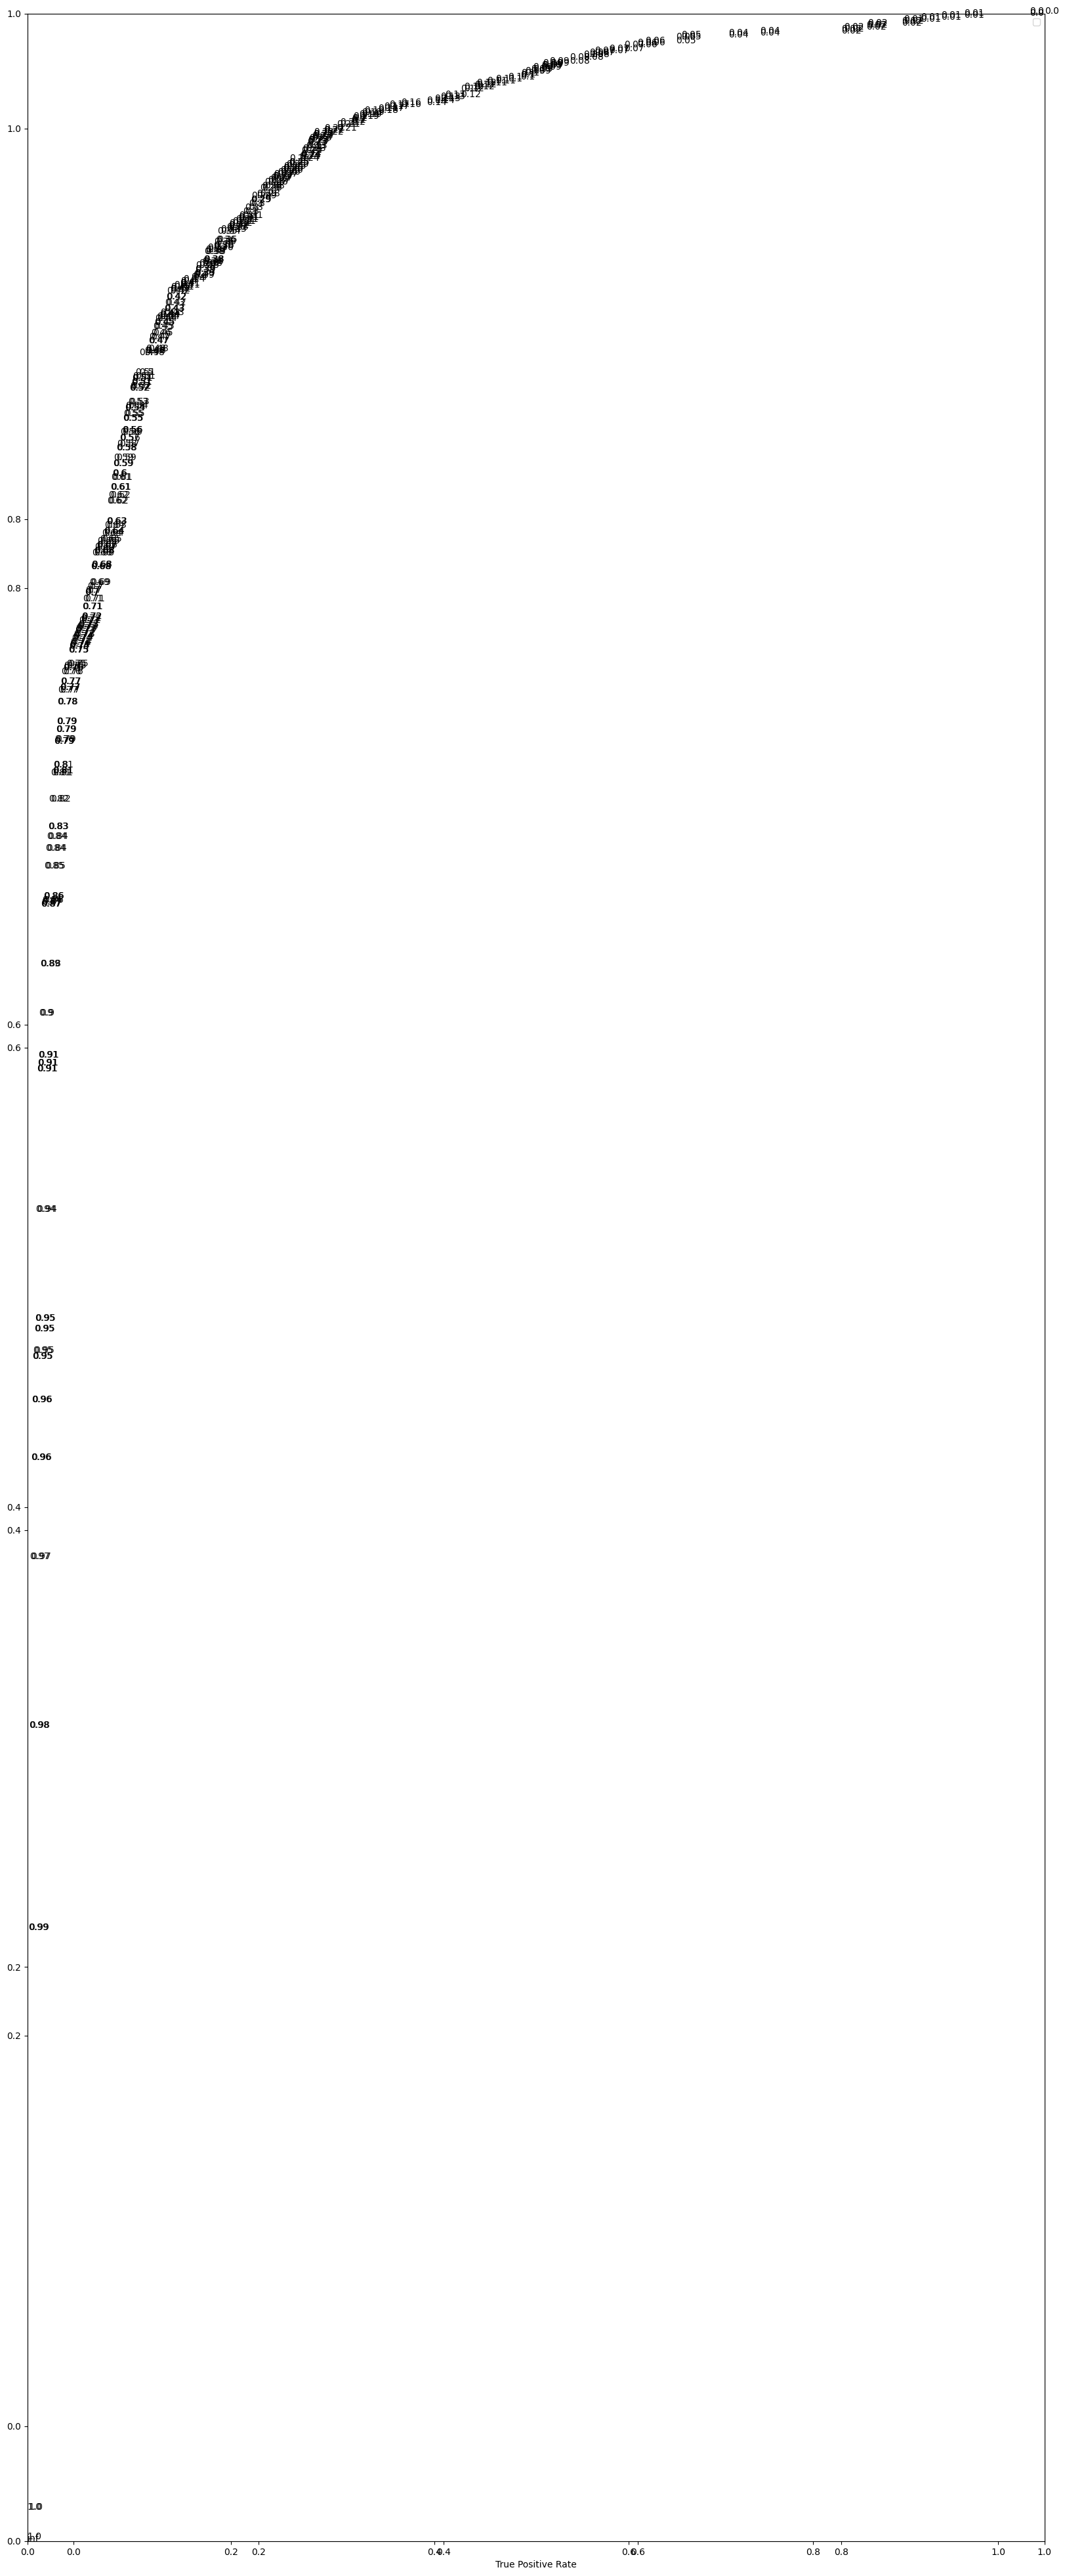

In [22]:
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label = 'Dummy Model')
plt.plot(model_fpr,model_tpr,marker = '.', label = 'Logestic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))

# axis labels
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')

#show Labels
plt.legend()

# show the plot
plt.show()